In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank=pd.read_csv('bank 1.csv')

In [3]:
bank.drop(['x1'] , axis=1 , inplace=True)
bank.drop(['x9'], axis=1 , inplace=True)

In [4]:
x=bank.drop('T' ,axis=1).values
y=bank['T'].values

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=0)

In [7]:
print('the shape of x_train: ' , x_train.shape)
print('the shape of y_train: ' , y_train.shape)
print('the shape of x_test: ' , x_test.shape)
print('the shape of y_test: ' , y_test.shape)

the shape of x_train:  (8594, 14)
the shape of y_train:  (8594,)
the shape of x_test:  (2149, 14)
the shape of y_test:  (2149,)


In [15]:
unique, counts = np.unique( y_train, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique( y_test, return_counts=True)
print (np.asarray((unique, counts)).T)


[[   0 7480]
 [   1 1114]]
[[   0 1861]
 [   1  288]]


In [16]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
sm.fit(x_train ,y_train)
x_re,y_re = sm.fit_resample(x_train ,y_train)

In [18]:
unique, counts = np.unique( y_re, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique( y_test, return_counts=True)
print (np.asarray((unique, counts)).T)


[[   0 7480]
 [   1 7480]]
[[   0 1861]
 [   1  288]]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

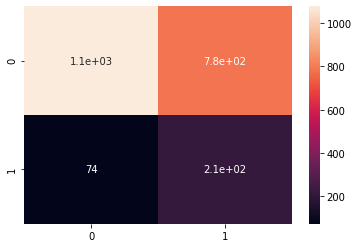

In [13]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_re,y_re)
from sklearn.metrics import classification_report ,confusion_matrix
y_predict=xg.predict(x_test)
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot=True)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1861
           1       0.21      0.74      0.33       288

    accuracy                           0.60      2149
   macro avg       0.58      0.66      0.52      2149
weighted avg       0.84      0.60      0.66      2149



col_0,0,1
row_0,,
0,1077,784
1,74,214
